In [290]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from pytz import timezone
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

In [365]:
df = pd.read_csv("df_regions.csv")

In [127]:
df.shape

(944887, 18)

In [357]:
944887/1094475

0.8633244249526029

In [348]:
df['trapId'].nunique()

20324

In [4]:
df.head(10)

,id,when,activityType,strikeTime,batchId,createdBy,trapId,groupId,organisationId,killType,latitude,longitude,temperature,batteryLevel,hasImage,trapInstalledAt,region,city
0,1,2018-06-17 20:12:02.455+00,SYNCED,NaN,1.0,NaN,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,100.0,False,2018-06-17 20:12:02.157+00,Wellington,Wellington
1,4,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:10:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington
2,7,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:13:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington
3,2,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:08:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington
4,6,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:12:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington
5,5,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:11:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington
6,3,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:09:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington
7,8,2018-06-17 20:12:03.092+00,SYNCED,NaN,2.0,NaN,2,NaN,NaN,NaN,-42.590843,171.135977,NaN,100.0,False,2018-06-17 20:12:02.913+00,West Coast,Greymouth
8,9,2018-06-17 20:12:03.102+00,STRIKE,2018-03-11 19:23:19+00,2.0,2.0,2,NaN,NaN,NaN,-42.590843,171.135977,NaN,NaN,False,2018-06-17 20:12:02.913+00,West Coast,Greymouth
9,10,2018-06-17 20:12:03.728+00,SYNCED,NaN,3.0,NaN,3,NaN,NaN,NaN,-39.060976,174.069333,NaN,100.0,False,2018-06-17 20:12:03.57+00,Taranaki,New Plymouth


In [10]:
import pandas as pd

# Filter dataframe to include only strikes
strikes_df = df[df['activityType'] == 'STRIKE']

# Group strikes by trapId
grouped_strikes = strikes_df.groupby('trapId')

# Calculate the strike rate for each trapId
strike_rate_df = pd.DataFrame()
strike_rate_df['trapId'] = grouped_strikes['trapId'].first()
strike_rate_df['first_strike_time'] = grouped_strikes['strikeTime'].min()
strike_rate_df['last_strike_time'] = grouped_strikes['strikeTime'].max()
strike_rate_df['duration_days'] = (strike_rate_df['last_strike_time'] - strike_rate_df['first_strike_time']).dt.days
strike_rate_df['strike_count'] = grouped_strikes.size()
strike_rate_df['strike_rate'] = strike_rate_df['strike_count'] / strike_rate_df['duration_days']

# Print the strike rate dataframe
print(strike_rate_df)

        trapId         first_strike_time          last_strike_time  \
trapId                                                               
1            1 2017-04-04 06:08:20+00:00 2017-04-04 06:13:20+00:00   
2            2 2018-03-11 19:23:19+00:00 2018-03-11 19:23:19+00:00   
3            3 2018-03-10 02:50:19+00:00 2018-03-10 02:50:19+00:00   
4            4 2018-03-10 02:49:18+00:00 2018-03-10 02:49:18+00:00   
5            5 2018-03-09 11:01:07+00:00 2018-03-09 11:03:07+00:00   
...        ...                       ...                       ...   
32066    32066 2021-07-31 15:01:02+00:00 2021-07-31 15:01:02+00:00   
32078    32078 2021-08-01 13:41:01+00:00 2021-08-01 13:41:01+00:00   
32093    32093 2021-07-31 22:57:01+00:00 2021-07-31 22:57:01+00:00   
32104    32104 2021-08-01 00:39:02+00:00 2021-08-01 00:39:02+00:00   
32132    32132 2021-08-01 02:52:01+00:00 2021-08-01 02:52:01+00:00   

        duration_days  strike_count  strike_rate  
trapId                                

In [ ]:
from pytz import timezone

gn['trapInstalledAt'] = pd.to_datetime(gn['trapInstalledAt'])
gn['strikeTime'] = pd.to_datetime(gn['strikeTime'])
gn['when'] = pd.to_datetime(gn['when'])

nz_timezone = timezone('Pacific/Auckland')
gn['trapInstalledAt_NZ'] = gn['trapInstalledAt'].dt.tz_convert(nz_timezone)

In [12]:
strikes_df

,id,when,activityType,strikeTime,batchId,createdBy,trapId,groupId,organisationId,killType,latitude,longitude,temperature,batteryLevel,hasImage,trapInstalledAt,region,city,trapInstalledAt_NZ,strikeTime_NZ
1,4,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:10:20+00:00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157000+00:00,Wellington,Wellington,2018-06-18 08:12:02.157000+12:00,2017-04-04 18:10:20+12:00
2,7,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:13:20+00:00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157000+00:00,Wellington,Wellington,2018-06-18 08:12:02.157000+12:00,2017-04-04 18:13:20+12:00
3,2,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:08:20+00:00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157000+00:00,Wellington,Wellington,2018-06-18 08:12:02.157000+12:00,2017-04-04 18:08:20+12:00
4,6,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:12:20+00:00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157000+00:00,Wellington,Wellington,2018-06-18 08:12:02.157000+12:00,2017-04-04 18:12:20+12:00
5,5,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:11:20+00:00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157000+00:00,Wellington,Wellington,2018-06-18 08:12:02.157000+12:00,2017-04-04 18:11:20+12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944842,1407100,2021-08-01 20:37:14.644+00,STRIKE,2021-08-01 13:41:01+00:00,118847.0,18382.0,32078,NaN,NaN,NaN,-36.253335,175.421337,7.0,NaN,False,2021-07-31 04:39:16.474000+00:00,Waikato,Coromandel,2021-07-31 16:39:16.474000+12:00,2021-08-02 01:41:01+12:00
944851,1407112,2021-08-01 20:44:46.456+00,STRIKE,2021-05-02 20:16:07+00:00,118848.0,5945.0,13433,NaN,NaN,NaN,-41.320503,174.790301,10.0,NaN,False,2020-04-26 00:48:46.186000+00:00,Wellington,Wellington,2020-04-26 12:48:46.186000+12:00,2021-05-03 08:16:07+12:00
944867,1407130,2021-08-01 20:53:22.457+00,STRIKE,2021-06-19 14:13:01+00:00,118849.0,16255.0,30276,NaN,NaN,NaN,-36.731546,174.685668,12.0,NaN,False,2021-06-19 03:58:48.092000+00:00,Auckland,Rothesay Bay,2021-06-19 15:58:48.092000+12:00,2021-06-20 02:13:01+12:00
944868,1407129,2021-08-01 20:53:22.457+00,STRIKE,2021-07-30 13:33:02+00:00,118849.0,16255.0,30276,NaN,NaN,NaN,-36.731546,174.685668,11.0,NaN,False,2021-06-19 03:58:48.092000+00:00,Auckland,Rothesay Bay,2021-06-19 15:58:48.092000+12:00,2021-07-31 01:33:02+12:00


In [ ]:
gn.isnull().sum(axis=0)

In [148]:
from pytz import timezone

nz_timezone = timezone('Pacific/Auckland')
def convert_tz(gn):
    gn['trapInstalledAt'] = pd.to_datetime(gn['trapInstalledAt'])
    gn['strikeTime'] = pd.to_datetime(gn['strikeTime'])
    gn['when'] = pd.to_datetime(gn['when'])
    
    gn['trapInstalledAt_NZ'] = gn['trapInstalledAt'].dt.tz_convert(nz_timezone)
    gn['strikeTime_NZ'] = gn['strikeTime'].dt.tz_convert(nz_timezone)
    gn['when_NZ'] = gn['when'].dt.tz_convert(nz_timezone)  
    
    return gn

In [585]:
def calculate_strike_rate(group):
    first_strike_time = group['strikeTime_NZ'].min()
    last_strike_time = group['strikeTime_NZ'].max()
    when = group['when'].max()
    trap_installed = group['trapInstalledAt'].min()
    duration = (last_strike_time - first_strike_time).days
    strike_count = len(group)
    if duration <= 0:
        duration = (when - last_strike_time).days
        if duration <= 0:
            duration = (when - trap_installed).days
            if duration <= 0: 
                duration = (last_strike_time - trap_installed).days
                if duration <= 0: 
                    duration = 1
    strike_rate = strike_count / duration
    return strike_rate

In [139]:
df['trapInstalledAt'] = pd.to_datetime(df['trapInstalledAt'])
df['strikeTime'] = pd.to_datetime(df['strikeTime'])
df['when'] = pd.to_datetime(df['when'])


In [59]:
df_strikes = df[df['activityType'] == 'STRIKE']
grouped_df = df_strikes.groupby('trapId')
print(grouped_df['strikeTime_NZ'])
strike_rate_df = grouped_df.apply(calculate_strike_rate).reset_index(name='strike_rate')
strike_rate_df

,trapId,strike_rate
0,1,0.013667
1,2,0.010204
2,3,0.010101
3,4,0.010101
4,5,0.030000
...,...,...
13643,32066,1.000000
13644,32078,1.000000
13645,32093,1.000000
13646,32104,1.000000


In [51]:
print(df_strikes.shape)
print(df.shape)
print(df['trapId'].nunique())
df_strikes['trapId'].nunique()

(110852, 20)
(944887, 20)
20324


13648

In [44]:
top_10_strikes = strike_rate_df.nlargest(10, 'strike_rate')
print(top_10_strikes[['trapId', 'strike_rate']])


     trapId  strike_rate
727    1086   186.000000
744    1138   185.000000
725    1083   183.000000
724    1082   118.000000
728    1087    98.500000
736    1117    69.000000
713    1069    44.000000
723    1081    37.666667
722    1079    30.000000
715    1071    29.000000


In [135]:
strike_rate_df[strike_rate_df['strike_rate'] < 0]

,trapId,strike_rate
712,1068,-32.0
729,1089,-1.0
730,1091,-5.0
733,1101,-63.0
734,1113,-1.0
...,...,...
13586,31730,-1.0
13589,31764,-1.0
13590,31767,-1.0
13631,31969,-1.0


In [584]:
filtered_df = df_sr_lu[(df_sr_lu['trapId'] == 1086   ) & (df_sr_lu['activityType'] == 'STRIKE')]
filtered_df['strikeTime'].max()

Timestamp('2018-08-22 23:56:06+0000', tz='UTC')

In [149]:
filtered_df = df[(df['trapId'] == 1089)]
filtered_df

,id,when,activityType,strikeTime,batchId,createdBy,trapId,groupId,organisationId,killType,latitude,longitude,temperature,batteryLevel,hasImage,trapInstalledAt,region,city
7304,9052,2018-08-23 04:16:15.057000+00:00,SYNCED,NaT,1977.0,NaN,1089,NaN,NaN,NaN,-36.845157,174.767558,NaN,80.0,False,2018-08-23 04:16:06.040000+00:00,Auckland,Auckland
7305,9053,2018-08-23 04:16:15.063000+00:00,STRIKE,2018-08-23 04:15:01+00:00,1977.0,1004.0,1089,NaN,NaN,NaN,-36.845157,174.767558,23.0,NaN,False,2018-08-23 04:16:06.040000+00:00,Auckland,Auckland


In [170]:
filtered_df = convert_tz(filtered_df)

# filtered_df['strikeTime'] = pd.to_datetime(filtered_df['strikeTime'])
# filtered_df['when'] = pd.to_datetime(filtered_df['when'])

# filtered_df['trapInstalledAt_NZ'] = filtered_df['trapInstalledAt'].dt.tz_convert(nz_timezone)
# filtered_df['strikeTime_NZ'] = filtered_df['strikeTime'].dt.tz_convert(nz_timezone)
# filtered_df['when_NZ'] = filtered_df['when'].dt.tz_convert(nz_timezone)
filtered_df = convert_tz(filtered_df)
print(filtered_df)
grouped_df_f = filtered_df.groupby('trapId')
strike_rate_df_f = grouped_df_f.apply(calculate_strike_rate).reset_index(name='strike_rate')
strike_rate_df_f

        id                             when activityType  \
7305  9053 2018-08-23 04:16:15.063000+00:00       STRIKE   

                    strikeTime  batchId  createdBy  trapId  groupId  \
7305 2018-08-23 04:15:01+00:00   1977.0     1004.0    1089      NaN   

      organisationId killType  ...   longitude  temperature  batteryLevel  \
7305             NaN      NaN  ...  174.767558         23.0           NaN   

      hasImage                  trapInstalledAt    region      city  \
7305     False 2018-08-23 04:16:06.040000+00:00  Auckland  Auckland   

                   trapInstalledAt_NZ             strikeTime_NZ  \
7305 2018-08-23 16:16:06.040000+12:00 2018-08-23 16:15:01+12:00   

                              when_NZ  
7305 2018-08-23 16:16:15.063000+12:00  

[1 rows x 21 columns]
1
1


/tmp/ipykernel_3121/852521279.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gn['trapInstalledAt'] = pd.to_datetime(gn['trapInstalledAt'])
/tmp/ipykernel_3121/852521279.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gn['strikeTime'] = pd.to_datetime(gn['strikeTime'])
/tmp/ipykernel_3121/852521279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,trapId,strike_rate
0,1089,1.0


In [ ]:
https://data.mfe.govt.nz/services/query/v1/vector.json?key=801a552ac4274452bb8daebd262edbde&layer=52375&x=[-40.914534]&y=[175.094517]&max_results=3&radius=10000&geometry=true&with_field_names=true
801a552ac4274452bb8daebd262edbde

In [87]:
import requests

url = "https://data.mfe.govt.nz/services/query/v1/vector.json"
params = {
    "key": "801a552ac4274452bb8daebd262edbde",
    "layer": "52375",
    "x": "175.094517",
    "y": "-40.914534",
    "max_results": "3",
    "radius": "10000",
    "geometry": "true",
    "with_field_names": "true"
}

response = requests.get(url, params=params)
# print(response.content)
if response.status_code == 200:
    features = data['vectorQuery']['layers']['52375']['features'][0]['properties']['LUCNA_2016']
    print(features)
    
#     for feature in features:
#         properties = feature['properties']
#         lucna_2016 = properties['LUCNA_2016']
#         print("LUCNA_2016:", lucna_2016)

74 - Grassland - With woody biomass


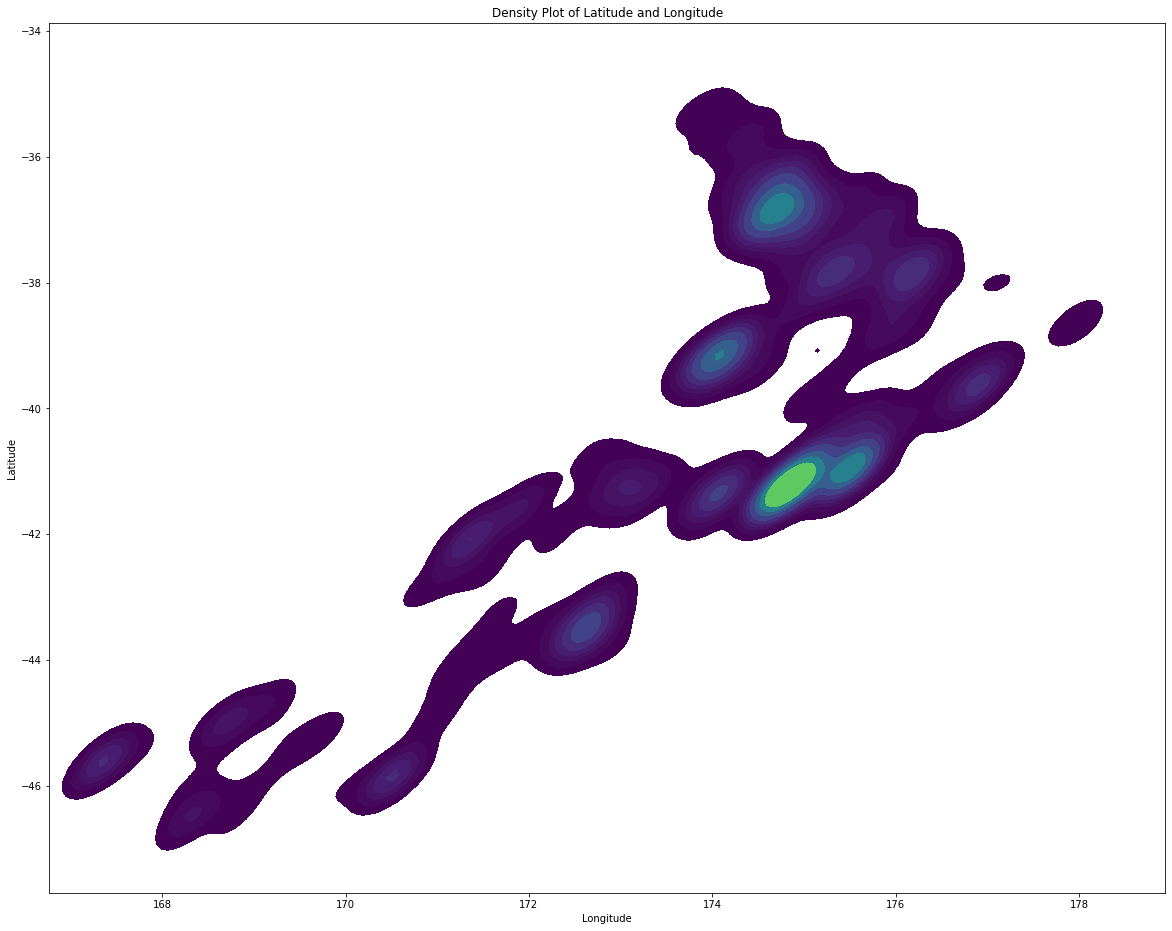

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Set the figure size
plt.figure(figsize=(20, 16))

# Use Seaborn's kdeplot
sns.kdeplot(data=df, x='longitude', y='latitude', cmap='viridis', fill=True)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Density Plot of Latitude and Longitude')

# Show the plot
plt.show()

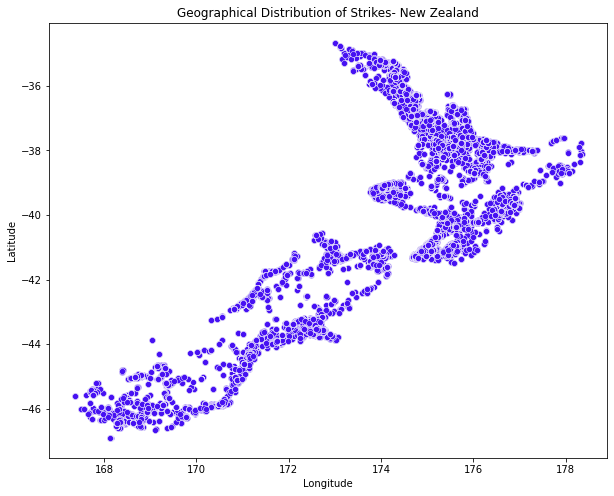

In [412]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', color='#4611f2', data=df)
plt.title('Geographical Distribution of Strikes- New Zealand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [539]:
df.columns

Index(['id', 'when', 'activityType', 'strikeTime', 'batchId', 'createdBy',
       'trapId', 'groupId', 'organisationId', 'killType', 'latitude',
       'longitude', 'temperature', 'batteryLevel', 'hasImage',
       'trapInstalledAt', 'region', 'city', 'year', 'month', 'hour',
       'strikeTime_NZ'],
      dtype='object')

In [561]:
data.columns

Index(['activityType', 'strikeTime', 'trapId', 'temperature',
       'trapInstalledAt', 'region', 'city', 'landUse', 'strike_rate',
       'trapInstalledAt_NZ', 'strikeTime_NZ', 'when_NZ', 'st_year', 'st_month',
       'st_day', 'st_hour', 'size_category'],
      dtype='object')

In [563]:
data['strike_rate']

4790       2.000000
4793       2.000000
4796       0.006028
4797       0.006028
4798       0.006028
             ...   
1439170    1.000000
1439185    0.016438
1439213    0.050000
1439215    0.050000
1439239    0.083333
Name: strike_rate, Length: 116908, dtype: float64

In [579]:
df.shape

(944887, 22)

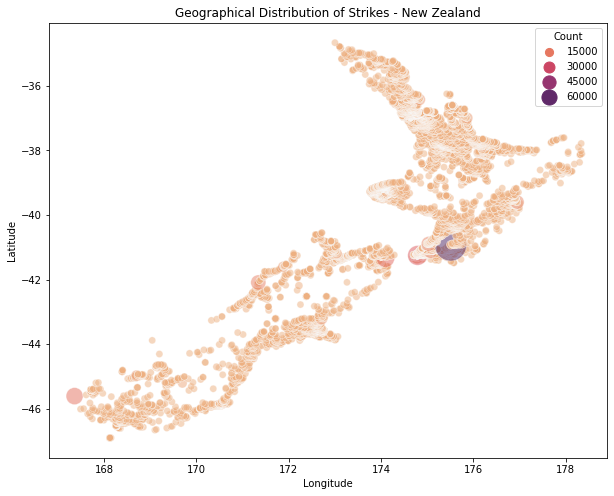

In [580]:
# Calculate the frequency of occurrence for each coordinate
coordinate_counts = df.groupby(['latitude', 'longitude']).size().reset_index(name='count')

plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', size='count', sizes=(50, 1000), hue='count', alpha = 0.5, palette='flare', data=coordinate_counts)
plt.title('Geographical Distribution of Strikes - New Zealand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Count', markerscale=0.5)
plt.show()


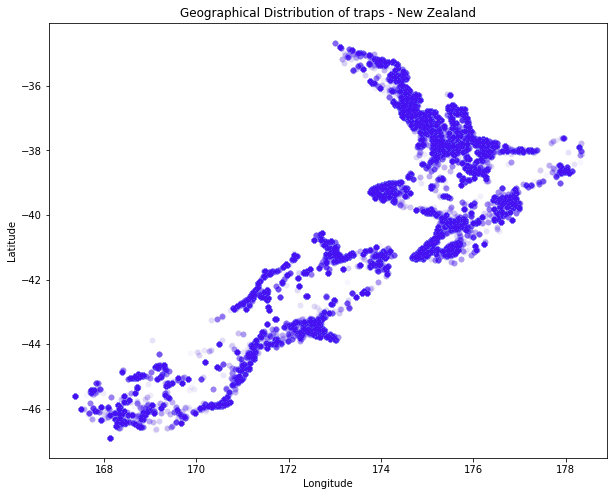

In [581]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, color='#4611f2', alpha=0.02)
plt.title('Geographical Distribution of traps - New Zealand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [104]:
df_uq = df.drop_duplicates(subset='trapId')
df_uq.shape

(20324, 20)

In [118]:
url = "https://data.mfe.govt.nz/services/query/v1/vector.json"
api_key = "801a552ac4274452bb8daebd262edbde"
layer = "52375"

for index, row in df_land_use_null.iterrows():
    longitude = row['longitude']
    latitude = row['latitude']
    
    params = {
        "key": api_key,
        "layer": layer,
        "x": str(longitude),
        "y": str(latitude),
        "max_results": "1",
        "radius": "100",
        "geometry": "true",
        "with_field_names": "true"
    }
    
    response = requests.get(url, params=params)
    data = response.json()
    
    land_use = data['vectorQuery']['layers']['52375']['features'][0]['properties']['LUCNA_2016']
    df_land_use_null.loc[index, 'landUse'] = land_use

In [119]:
df_land_use_null

,id,when,activityType,strikeTime,batchId,createdBy,trapId,groupId,organisationId,killType,...,longitude,temperature,batteryLevel,hasImage,trapInstalledAt,region,city,trapInstalledAt_NZ,strikeTime_NZ,landUse
191553,259575,2020-04-10 04:49:17+00:00,SYNCED,NaT,NaN,NaN,9179,NaN,NaN,NaN,...,170.555156,NaN,NaN,False,2020-01-04 08:54:46+00:00,Otago,Dunedin,2020-01-04 21:54:46+13:00,NaT,71 - Natural Forest
191687,259537,2020-04-10 08:00:00.402000+00:00,CO2_LOW,NaT,NaN,NaN,6097,1873.0,21.0,NaN,...,174.087867,NaN,NaN,False,2019-10-10 05:20:29+00:00,Taranaki,New Plymouth,2019-10-10 18:20:29+13:00,NaT,75 - Grassland - High producing
191712,259576,2020-04-10 11:47:09.808000+00:00,SYNCED,NaT,NaN,NaN,12346,NaN,NaN,NaN,...,176.904713,NaN,NaN,False,2020-03-14 23:37:37.121000+00:00,Hawke's Bay,Hastings,2020-03-15 12:37:37.121000+13:00,NaT,74 - Grassland - With woody biomass
191867,259751,2020-04-10 21:43:43.099000+00:00,SYNCED,NaT,NaN,NaN,13153,NaN,NaN,NaN,...,174.907923,NaN,NaN,False,2020-04-10 21:41:28.802000+00:00,Auckland,Pukekohe East,2020-04-11 09:41:28.802000+12:00,NaT,75 - Grassland - High producing
191898,259789,2020-04-10 22:17:15.631000+00:00,SYNCED,NaT,NaN,NaN,6121,NaN,NaN,NaN,...,168.820158,NaN,NaN,False,2019-10-12 01:54:26.036000+00:00,Otago,Arrowtown,2019-10-12 14:54:26.036000+13:00,NaT,81 - Settlements or built-up area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944112,1406247,2021-08-01 03:50:08+00:00,SYNCED,NaT,NaN,NaN,32131,NaN,NaN,NaN,...,175.246154,NaN,NaN,False,2021-08-01 03:45:48+00:00,Waikato,Hamilton,2021-08-01 15:45:48+12:00,NaT,81 - Settlements or built-up area
944135,1406203,2021-08-01 04:07:06.813000+00:00,STRIKE,2021-08-01 02:52:01+00:00,118797.0,18401.0,32132,NaN,NaN,NaN,...,173.154913,26.0,NaN,False,2021-08-01 02:49:57+00:00,Tasman,Richmond,2021-08-01 14:49:57+12:00,2021-08-01 14:52:01+12:00,77 - Cropland - Orchards and vineyards (perenn...
944166,1406240,2021-08-01 04:26:02.117000+00:00,STRIKE,2021-07-11 11:14:01+00:00,118803.0,17162.0,30528,NaN,NaN,Mouse,...,175.160285,3.0,NaN,False,2021-06-23 19:34:55+00:00,Waikato,Hamilton,2021-06-24 07:34:55+12:00,2021-07-11 23:14:01+12:00,75 - Grassland - High producing
944359,1406513,2021-08-01 06:47:08.531000+00:00,TEST_STRIKE,2021-08-01 03:19:01+00:00,118818.0,18228.0,32141,NaN,NaN,Test strike,...,175.505361,22.0,NaN,False,2021-08-01 03:12:04+00:00,Waikato,Coromandel,2021-08-01 15:12:04+12:00,2021-08-01 15:19:01+12:00,76 - Grassland - Low producing


In [117]:
df_uq
df_uq['landUse'].isnull().sum()
df_uq['landUse'].notnull().sum()
df_land_use_null = df_uq[df_uq['landUse'].isnull()]
df_land_use_null.iloc[0]

id                                       259575
when                  2020-04-10 04:49:17+00:00
activityType                             SYNCED
strikeTime                                  NaT
batchId                                     NaN
createdBy                                   NaN
trapId                                     9179
groupId                                     NaN
organisationId                              NaN
killType                                    NaN
latitude                             -45.879555
longitude                            170.555156
temperature                                 NaN
batteryLevel                                NaN
hasImage                                  False
trapInstalledAt       2020-01-04 08:54:46+00:00
region                                    Otago
city                                    Dunedin
trapInstalledAt_NZ    2020-01-04 21:54:46+13:00
strikeTime_NZ                               NaT
landUse                                 

In [123]:
df_land_use = pd.concat([df_uq, df_land_use_null])
df_land_use

,id,when,activityType,strikeTime,batchId,createdBy,trapId,groupId,organisationId,killType,...,longitude,temperature,batteryLevel,hasImage,trapInstalledAt,region,city,trapInstalledAt_NZ,strikeTime_NZ,landUse
0,1,2018-06-17 20:12:02.455000+00:00,SYNCED,NaT,1.0,NaN,1,NaN,NaN,NaN,...,174.780174,NaN,100.0,False,2018-06-17 20:12:02.157000+00:00,Wellington,Wellington,2018-06-18 08:12:02.157000+12:00,NaT,81 - Settlements or built-up area
7,8,2018-06-17 20:12:03.092000+00:00,SYNCED,NaT,2.0,NaN,2,NaN,NaN,NaN,...,171.135977,NaN,100.0,False,2018-06-17 20:12:02.913000+00:00,West Coast,Greymouth,2018-06-18 08:12:02.913000+12:00,NaT,76 - Grassland - Low producing
9,10,2018-06-17 20:12:03.728000+00:00,SYNCED,NaT,3.0,NaN,3,NaN,NaN,NaN,...,174.069333,NaN,100.0,False,2018-06-17 20:12:03.570000+00:00,Taranaki,New Plymouth,2018-06-18 08:12:03.570000+12:00,NaT,81 - Settlements or built-up area
11,12,2018-06-17 20:12:04.311000+00:00,SYNCED,NaT,4.0,NaN,4,NaN,NaN,NaN,...,174.076963,NaN,100.0,False,2018-06-17 20:12:04.157000+00:00,Taranaki,New Plymouth,2018-06-18 08:12:04.157000+12:00,NaT,81 - Settlements or built-up area
13,14,2018-06-17 20:12:04.887000+00:00,SYNCED,NaT,5.0,NaN,5,NaN,NaN,NaN,...,168.765990,NaN,100.0,False,2018-06-17 20:12:04.740000+00:00,Otago,Arrowtown,2018-06-18 08:12:04.740000+12:00,NaT,75 - Grassland - High producing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944112,1406247,2021-08-01 03:50:08+00:00,SYNCED,NaT,NaN,NaN,32131,NaN,NaN,NaN,...,175.246154,NaN,NaN,False,2021-08-01 03:45:48+00:00,Waikato,Hamilton,2021-08-01 15:45:48+12:00,NaT,81 - Settlements or built-up area
944135,1406203,2021-08-01 04:07:06.813000+00:00,STRIKE,2021-08-01 02:52:01+00:00,118797.0,18401.0,32132,NaN,NaN,NaN,...,173.154913,26.0,NaN,False,2021-08-01 02:49:57+00:00,Tasman,Richmond,2021-08-01 14:49:57+12:00,2021-08-01 14:52:01+12:00,77 - Cropland - Orchards and vineyards (perenn...
944166,1406240,2021-08-01 04:26:02.117000+00:00,STRIKE,2021-07-11 11:14:01+00:00,118803.0,17162.0,30528,NaN,NaN,Mouse,...,175.160285,3.0,NaN,False,2021-06-23 19:34:55+00:00,Waikato,Hamilton,2021-06-24 07:34:55+12:00,2021-07-11 23:14:01+12:00,75 - Grassland - High producing
944359,1406513,2021-08-01 06:47:08.531000+00:00,TEST_STRIKE,2021-08-01 03:19:01+00:00,118818.0,18228.0,32141,NaN,NaN,Test strike,...,175.505361,22.0,NaN,False,2021-08-01 03:12:04+00:00,Waikato,Coromandel,2021-08-01 15:12:04+12:00,2021-08-01 15:19:01+12:00,76 - Grassland - Low producing


In [366]:
df_new = df.merge(df_land_use[['trapId', 'landUse']], on='trapId', how='left')
df_new

,id,when,activityType,strikeTime,batchId,createdBy,trapId,groupId,organisationId,killType,latitude,longitude,temperature,batteryLevel,hasImage,trapInstalledAt,region,city,landUse
0,1,2018-06-17 20:12:02.455+00,SYNCED,NaN,1.0,NaN,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,100.0,False,2018-06-17 20:12:02.157+00,Wellington,Wellington,81 - Settlements or built-up area
1,4,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:10:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington,81 - Settlements or built-up area
2,7,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:13:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington,81 - Settlements or built-up area
3,2,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:08:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington,81 - Settlements or built-up area
4,6,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:12:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington,81 - Settlements or built-up area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439242,1407148,2021-08-01 21:02:40.056+00,SYNCED,NaN,NaN,NaN,30338,NaN,NaN,NaN,-36.731976,174.689250,NaN,NaN,False,2021-06-20 01:41:52.175+00,Auckland,Rothesay Bay,NaN
1439243,1407148,2021-08-01 21:02:40.056+00,SYNCED,NaN,NaN,NaN,30338,NaN,NaN,NaN,-36.731976,174.689250,NaN,NaN,False,2021-06-20 01:41:52.175+00,Auckland,Rothesay Bay,71 - Natural Forest
1439244,1407147,2021-08-01 21:02:40.056+00,SYNCED,NaN,NaN,NaN,30338,NaN,NaN,NaN,-36.731976,174.689250,NaN,NaN,False,2021-06-20 01:41:52.175+00,Auckland,Rothesay Bay,NaN
1439245,1407147,2021-08-01 21:02:40.056+00,SYNCED,NaN,NaN,NaN,30338,NaN,NaN,NaN,-36.731976,174.689250,NaN,NaN,False,2021-06-20 01:41:52.175+00,Auckland,Rothesay Bay,71 - Natural Forest


In [367]:
df_new.shape

(1439247, 19)

In [130]:
strike_rate_df

,trapId,strike_rate
0,1,0.013667
1,2,0.010204
2,3,0.010101
3,4,0.010101
4,5,0.030000
...,...,...
13643,32066,1.000000
13644,32078,1.000000
13645,32093,1.000000
13646,32104,1.000000


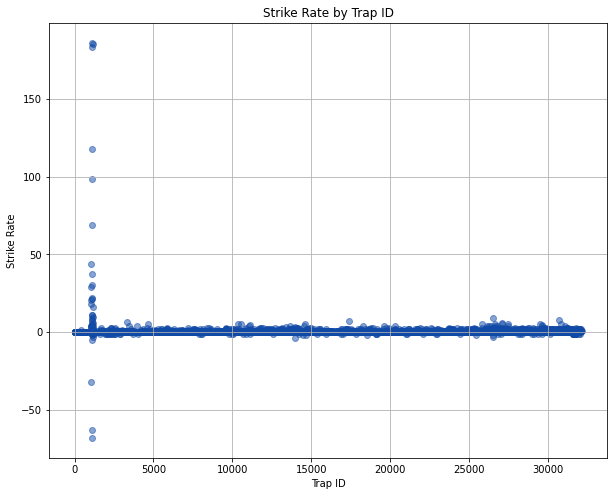

In [181]:
import numpy as np
# Plot scatterplot with grids
plt.figure(figsize=(10, 8))
plt.scatter(strike_rate_df['trapId'], strike_rate_df['strike_rate'], c = '#114aa6', alpha = 0.5)
plt.title('Strike Rate by Trap ID')
plt.xlabel('Trap ID')
plt.ylabel('Strike Rate')
plt.grid(True)
plt.show()

In [586]:
df_strikes = df[df['activityType'] == 'STRIKE']
df_strikes = convert_tz(df_strikes)
grouped_df = df_strikes.groupby('trapId')
print(grouped_df['strikeTime_NZ'])
strike_rate_df_pve = grouped_df.apply(calculate_strike_rate).reset_index(name='strike_rate')
strike_rate_df_pve

/tmp/ipykernel_3121/852521279.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gn['trapInstalledAt'] = pd.to_datetime(gn['trapInstalledAt'])
/tmp/ipykernel_3121/852521279.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gn['strikeTime'] = pd.to_datetime(gn['strikeTime'])
/tmp/ipykernel_3121/852521279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,trapId,strike_rate
0,1,0.013667
1,2,0.010204
2,3,0.010101
3,4,0.010101
4,5,0.030000
...,...,...
13643,32066,1.000000
13644,32078,1.000000
13645,32093,1.000000
13646,32104,1.000000


In [172]:
strike_rate_df_pve

,trapId,strike_rate
0,1,0.013667
1,2,0.010204
2,3,0.010101
3,4,0.010101
4,5,0.030000
...,...,...
13643,32066,1.000000
13644,32078,1.000000
13645,32093,1.000000
13646,32104,1.000000


In [175]:
strike_rate_df_pve.describe()

,trapId,strike_rate
count,13648.000000,13648.000000
mean,14318.677755,0.307013
std,8698.222696,3.317519
min,1.000000,0.000053
25%,6979.500000,0.029851
50%,13556.000000,0.061056
75%,21381.500000,0.155628
max,32132.000000,186.000000


In [474]:
data['strike_rate'].describe()

count    116908.000000
mean          1.573172
std          14.184373
min           0.000000
25%           0.036876
50%           0.065116
75%           0.142857
max         186.000000
Name: strike_rate, dtype: float64

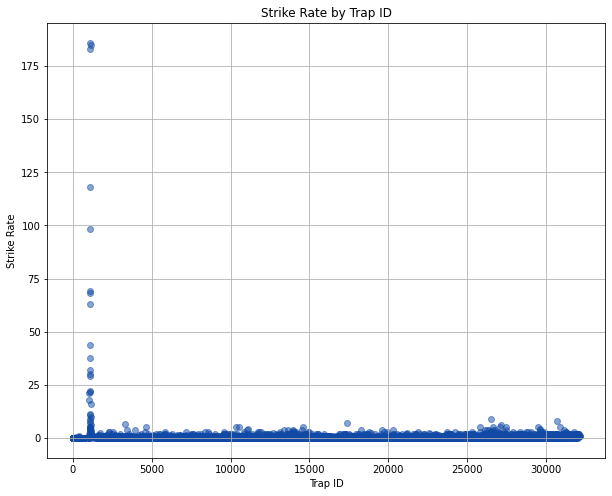

In [180]:
import numpy as np
# Plot scatterplot with grids
plt.figure(figsize=(10, 8))
plt.scatter(strike_rate_df_pve['trapId'], strike_rate_df_pve['strike_rate'], c = '#114aa6', alpha = 0.5)
plt.title('Strike Rate by Trap ID')
plt.xlabel('Trap ID')
plt.ylabel('Strike Rate')
plt.grid(True)
plt.show()

In [349]:
df_sr_lu.shape
df_sr_lu.to_csv("data_landuse_regions.csv")

In [383]:
df_sr_lu = df_new.merge(strike_rate_df_pve, on='trapId', how='left')
df_sr_lu.shape

(1439247, 20)

In [371]:
df_sr_lu['trapId'].nunique()

20324

In [183]:
df_sr_lu['landUse'].unique()

array(['81 - Settlements or built-up area',
       '76 - Grassland - Low producing',
       '75 - Grassland - High producing', '71 - Natural Forest',
       '72 - Planted Forest - Pre 1990', '73 - Post 1989 Forest',
       '77 - Cropland - Orchards and vineyards (perennial)',
       '74 - Grassland - With woody biomass', '78 - Cropland - Annual',
       nan, '80 - Wetland - Vegetated non forest', '82 - Other'],
      dtype=object)

In [372]:
df_sr_lu

,id,when,activityType,strikeTime,batchId,createdBy,trapId,groupId,organisationId,killType,latitude,longitude,temperature,batteryLevel,hasImage,trapInstalledAt,region,city,landUse,strike_rate
0,1,2018-06-17 20:12:02.455+00,SYNCED,NaN,1.0,NaN,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,100.0,False,2018-06-17 20:12:02.157+00,Wellington,Wellington,81 - Settlements or built-up area,0.013667
1,4,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:10:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington,81 - Settlements or built-up area,0.013667
2,7,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:13:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington,81 - Settlements or built-up area,0.013667
3,2,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:08:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington,81 - Settlements or built-up area,0.013667
4,6,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:12:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington,81 - Settlements or built-up area,0.013667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439242,1407148,2021-08-01 21:02:40.056+00,SYNCED,NaN,NaN,NaN,30338,NaN,NaN,NaN,-36.731976,174.689250,NaN,NaN,False,2021-06-20 01:41:52.175+00,Auckland,Rothesay Bay,NaN,0.083333
1439243,1407148,2021-08-01 21:02:40.056+00,SYNCED,NaN,NaN,NaN,30338,NaN,NaN,NaN,-36.731976,174.689250,NaN,NaN,False,2021-06-20 01:41:52.175+00,Auckland,Rothesay Bay,71 - Natural Forest,0.083333
1439244,1407147,2021-08-01 21:02:40.056+00,SYNCED,NaN,NaN,NaN,30338,NaN,NaN,NaN,-36.731976,174.689250,NaN,NaN,False,2021-06-20 01:41:52.175+00,Auckland,Rothesay Bay,NaN,0.083333
1439245,1407147,2021-08-01 21:02:40.056+00,SYNCED,NaN,NaN,NaN,30338,NaN,NaN,NaN,-36.731976,174.689250,NaN,NaN,False,2021-06-20 01:41:52.175+00,Auckland,Rothesay Bay,71 - Natural Forest,0.083333


In [388]:
df_sr_lu["strike_rate"].isnull().sum()

0

In [387]:
df_sr_lu["strike_rate"].fillna(0, inplace= True)


In [390]:
df_sr_lu.head()

,id,when,activityType,strikeTime,batchId,createdBy,trapId,groupId,organisationId,killType,latitude,longitude,temperature,batteryLevel,hasImage,trapInstalledAt,region,city,landUse,strike_rate
0,1,2018-06-17 20:12:02.455+00,SYNCED,NaN,1.0,NaN,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,100.0,False,2018-06-17 20:12:02.157+00,Wellington,Wellington,81 - Settlements or built-up area,0.013667
1,4,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:10:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington,81 - Settlements or built-up area,0.013667
2,7,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:13:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington,81 - Settlements or built-up area,0.013667
3,2,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:08:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington,81 - Settlements or built-up area,0.013667
4,6,2018-06-17 20:12:02.461+00,STRIKE,2017-04-04 06:12:20+00,1.0,2.0,1,NaN,NaN,NaN,-41.277712,174.780174,NaN,NaN,False,2018-06-17 20:12:02.157+00,Wellington,Wellington,81 - Settlements or built-up area,0.013667


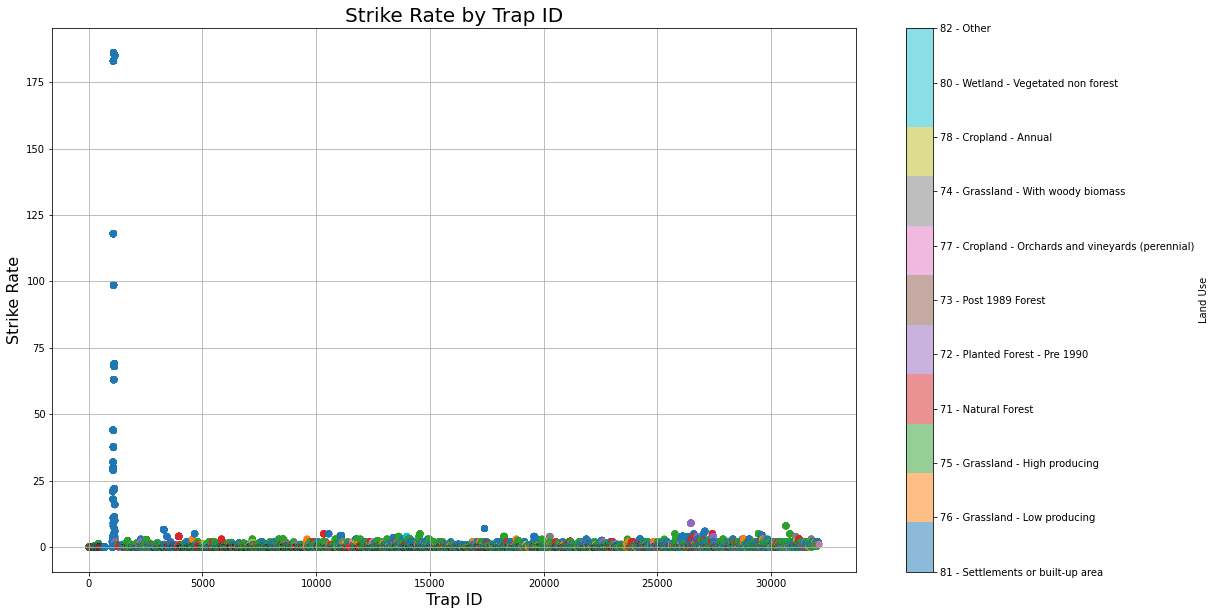

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create a dictionary to map land use categories to unique numeric codes
land_use_codes = {
    '81 - Settlements or built-up area': 1,
    '76 - Grassland - Low producing': 2,
    '75 - Grassland - High producing': 3,
    '71 - Natural Forest': 4,
    '72 - Planted Forest - Pre 1990': 5,
    '73 - Post 1989 Forest': 6,
    '77 - Cropland - Orchards and vineyards (perennial)': 7,
    '74 - Grassland - With woody biomass': 8,
    '78 - Cropland - Annual': 9,
    '80 - Wetland - Vegetated non forest': 10,
    '82 - Other': 11
}

# Map land use categories to numeric codes in the dataframe
df_sr_lu['landUseCode'] = df_sr_lu['landUse'].map(land_use_codes)

# Set up a colormap based on the number of unique land use codes
num_land_use_codes = len(land_use_codes)
cmap = cm.get_cmap('tab10', num_land_use_codes)

# Plot scatterplot with grids and different colors for land use categories
plt.figure(figsize=(18, 10))
plt.scatter(df_sr_lu['trapId'], df_sr_lu['strike_rate'], c=df_sr_lu['landUseCode'], cmap=cmap, alpha=0.5)
plt.title('Strike Rate by Trap ID', fontsize=20)
plt.xlabel('Trap ID', fontsize=16)
plt.ylabel('Strike Rate', fontsize=16)
plt.grid(True)

# Add a colorbar to indicate the land use categories
cbar = plt.colorbar()
cbar.set_ticks(range(1, num_land_use_codes+1))
cbar.set_ticklabels(land_use_codes.keys())
cbar.set_label('Land Use')

plt.show()


In [299]:
# Calculate the percentage of different categories of land use
land_use_percentages = df_sr_lu['landUse'].value_counts(normalize=True) * 100

# Display the percentages of different land use categories
print(land_use_percentages)


81 - Settlements or built-up area                     39.279277
75 - Grassland - High producing                       27.540890
71 - Natural Forest                                   15.071228
73 - Post 1989 Forest                                  7.719926
76 - Grassland - Low producing                         2.871327
74 - Grassland - With woody biomass                    2.836494
80 - Wetland - Vegetated non forest                    1.455786
77 - Cropland - Orchards and vineyards (perennial)     1.254000
72 - Planted Forest - Pre 1990                         0.915700
78 - Cropland - Annual                                 0.839382
82 - Other                                             0.215989
Name: landUse, dtype: float64


In [306]:
# Get the top 10, 100, 500, and 1000 strike rates
df_sr_lu_dd = df_sr_lu.drop_duplicates(subset=['trapId'])
top_strike_rates = df_sr_lu_dd.nlargest(1000, 'strike_rate')
top_strike_rates
# Calculate the percentage of land use in the top 10, 100, 500, and 1000 strike rates
top_strike_rate_land_use_percentages = top_strike_rates['landUse'].value_counts(normalize=True) * 100

# Display the percentages of land use in the top 10, 100, 500, and 1000 strike rates
print("Top Strikes in terms of land use")
print(top_strike_rate_land_use_percentages)


Top Strikes in terms of land use
75 - Grassland - High producing                       38.562092
81 - Settlements or built-up area                     37.581699
76 - Grassland - Low producing                         8.169935
71 - Natural Forest                                    6.862745
74 - Grassland - With woody biomass                    3.594771
78 - Cropland - Annual                                 2.287582
72 - Planted Forest - Pre 1990                         0.980392
77 - Cropland - Orchards and vineyards (perennial)     0.980392
73 - Post 1989 Forest                                  0.653595
82 - Other                                             0.326797
Name: landUse, dtype: float64


In [392]:
df_sr_lu = convert_tz(df_sr_lu)
df_sr_lu.columns

Index(['id', 'when', 'activityType', 'strikeTime', 'batchId', 'createdBy',
       'trapId', 'groupId', 'organisationId', 'killType', 'latitude',
       'longitude', 'temperature', 'batteryLevel', 'hasImage',
       'trapInstalledAt', 'region', 'city', 'landUse', 'strike_rate',
       'trapInstalledAt_NZ', 'strikeTime_NZ', 'when_NZ'],
      dtype='object')

In [407]:
df_sr_lu.shape

(1439247, 23)

In [411]:
# data['strikeTime_NZ'] = pd.to_datetime(df_sr_lu['strikeTime_NZ'])
data = data[data['strikeTime_NZ'].dt.year >= 2017]
data.shape

(116908, 17)

In [435]:
data.head()

,activityType,strikeTime,trapId,temperature,trapInstalledAt,region,city,landUse,strike_rate,trapInstalledAt_NZ,strikeTime_NZ,when_NZ,st_year,st_month,st_day,st_hour,st_minute
4790,STRIKE,2018-07-31 22:41:23+00:00,1022,22.0,2018-07-31 22:40:43.173000+00:00,Waikato,Matamata,81 - Settlements or built-up area,2.000000,2018-08-01 10:40:43.173000+12:00,2018-08-01 10:41:23+12:00,2018-08-01 10:41:23.920000+12:00,2018.0,7.0,31.0,22.0,41.0
4793,STRIKE,2018-07-31 22:41:58+00:00,1022,22.0,2018-07-31 22:40:43.173000+00:00,Waikato,Matamata,81 - Settlements or built-up area,2.000000,2018-08-01 10:40:43.173000+12:00,2018-08-01 10:41:58+12:00,2018-08-01 10:41:58.669000+12:00,2018.0,7.0,31.0,22.0,41.0
4796,STRIKE,2018-08-03 01:27:04.400000+00:00,1033,27.0,2018-08-03 02:13:46.207000+00:00,Auckland,Auckland,81 - Settlements or built-up area,0.006028,2018-08-03 14:13:46.207000+12:00,2018-08-03 13:27:04.400000+12:00,2018-08-03 14:16:38.172000+12:00,2018.0,8.0,3.0,1.0,27.0
4797,STRIKE,2018-07-31 22:36:34.100000+00:00,1033,24.0,2018-08-03 02:13:46.207000+00:00,Auckland,Auckland,81 - Settlements or built-up area,0.006028,2018-08-03 14:13:46.207000+12:00,2018-08-01 10:36:34.100000+12:00,2018-08-03 14:16:38.172000+12:00,2018.0,7.0,31.0,22.0,36.0
4798,STRIKE,2018-07-25 03:34:03.300000+00:00,1033,26.0,2018-08-03 02:13:46.207000+00:00,Auckland,Auckland,81 - Settlements or built-up area,0.006028,2018-08-03 14:13:46.207000+12:00,2018-07-25 15:34:03.300000+12:00,2018-08-03 14:16:38.172000+12:00,2018.0,7.0,25.0,3.0,34.0


In [438]:
# Group the data by 'st_year' and calculate the mean strike rate for each year
mean_strike_rate_by_year = data.groupby('st_year')['strike_rate'].mean()

# Print the mean strike rate for each year
print(mean_strike_rate_by_year)

percentage_change = mean_strike_rate_by_year.pct_change() * 100

# Print the percentage change per year
print(percentage_change)

st_year
2018.0    56.673997
2019.0     0.191790
2020.0     0.158825
2021.0     0.195780
Name: strike_rate, dtype: float64
st_year
2018.0          NaN
2019.0   -99.661591
2020.0   -17.188114
2021.0    23.267752
Name: strike_rate, dtype: float64


In [439]:
# Group the data by 'st_year' and calculate the mean strike rate for each year
mean_strike_rate_by_month = data.groupby('st_month')['strike_rate'].mean()

# Print the mean strike rate for each year
print(mean_strike_rate_by_month)

percentage_change = mean_strike_rate_by_month.pct_change() * 100

# Print the percentage change per year
print(percentage_change)

st_month
1.0      0.181549
2.0      0.160588
3.0      0.153904
4.0      0.174390
5.0      0.198534
6.0      0.224104
7.0      0.230368
8.0     21.373500
9.0      0.221877
10.0     0.134216
11.0     0.140339
12.0     0.164345
Name: strike_rate, dtype: float64
st_month
1.0             NaN
2.0      -11.545573
3.0       -4.162462
4.0       13.311365
5.0       13.844265
6.0       12.879859
7.0        2.794943
8.0     9177.982937
9.0      -98.961906
10.0     -39.508805
11.0       4.562201
12.0      17.105727
Name: strike_rate, dtype: float64


In [480]:
(0.181549 - 0.164345)/0.164345



0.10468222337156591

In [479]:
import pandas as pd

# Convert 'st_month' column to integers
data['st_month'] = data['st_month'].astype(int)

# Calculate average strike_rate per month
monthly_avg_strike_rate = data.groupby(['st_year', 'st_month'])['strike_rate'].mean().reset_index()

# Sort the DataFrame by year and month
monthly_avg_strike_rate.sort_values(['st_year', 'st_month'], inplace=True)

# Calculate percentage change from the previous month
monthly_avg_strike_rate['% Change'] = monthly_avg_strike_rate['strike_rate'].pct_change() * 100

# Replace NaN values with 0 for the first month in each year
monthly_avg_strike_rate.loc[monthly_avg_strike_rate['st_month'] == 1, '% Change'] = 0

# Convert month number to month name
monthly_avg_strike_rate['Month'] = monthly_avg_strike_rate['st_month'].apply(lambda x: pd.Timestamp(month=x, day=1, year=2000).strftime('%B'))

# Drop unnecessary columns
monthly_avg_strike_rate.drop(['st_year', 'st_month'], axis=1, inplace=True)

# Save to a CSV file
monthly_avg_strike_rate.to_csv('monthly_strike_rate.csv', index=False)


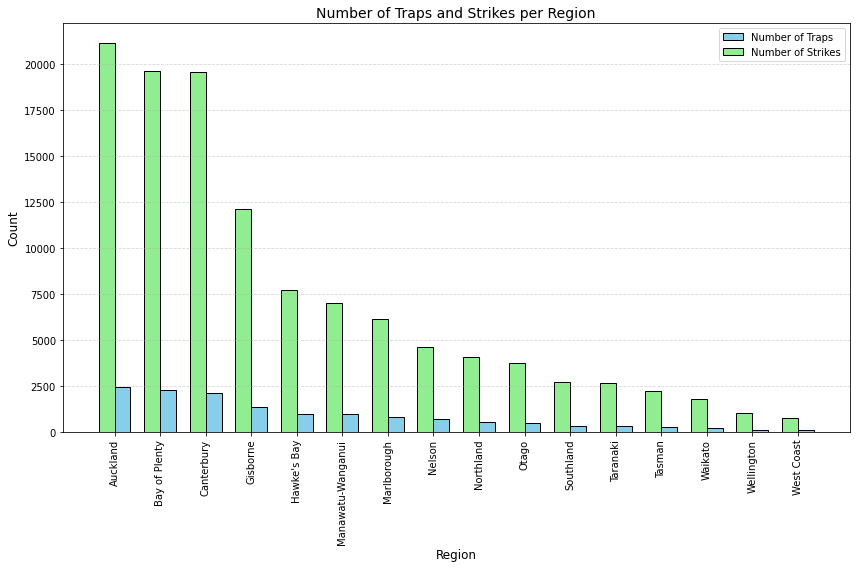

In [473]:
data_uq = data.drop_duplicates(subset='trapId')

# Count the number of traps per region in data_uq
trap_counts = data_uq['region'].value_counts()

# Count the number of strikes per region in data
strike_counts = data['region'].value_counts()

# Get the unique regions
regions = np.unique(data_uq['region'])

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(regions))
r2 = [x + bar_width for x in r1]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the number of traps per region
ax.bar(r2, trap_counts, color='skyblue', width=bar_width, edgecolor='black', label='Number of Traps')

# Plot the number of strikes per region
ax.bar(r1, strike_counts, color='lightgreen', width=bar_width, edgecolor='black', label='Number of Strikes')

# Set x-axis tick positions and labels
ax.set_xticks(r1 + bar_width / 2)
ax.set_xticklabels(regions, rotation=90)

# Set labels and title
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Traps and Strikes per Region', fontsize=14)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [449]:
import pandas as pd

# Assuming your DataFrame is named 'data' and the region column is named 'region'

# Calculate the mean strike rate for each region
mean_strike_rate_by_region = data.groupby('region')['strike_rate'].mean()

# Calculate the percentage coverage of each region
region_coverage = (data['region'].value_counts() / len(data)) * 100

# Create a new DataFrame with the mean strike rate and region coverage columns
reg_result = pd.DataFrame({'Region Coverage (%)': region_coverage, 'Mean Strike Rate': mean_strike_rate_by_region})

# Save the result to a CSV file
reg_result.to_csv('strike_rate_summary.csv', index=True)
reg_result

,Region Coverage (%),Mean Strike Rate
Auckland,18.082595,7.878311
Bay of Plenty,6.618880,0.196934
Canterbury,5.979060,0.181685
Gisborne,0.637253,0.182293
Hawke's Bay,2.262463,0.211675
Manawatu-Wanganui,3.490779,0.156485
Marlborough,1.548226,0.088615
Nelson,0.863927,0.167983
Northland,2.320628,0.229904
Otago,3.962090,0.239261


In [442]:
# Group the data by 'st_year' and calculate the mean strike rate for each year
mean_strike_rate_lu = data.groupby('landUse')['strike_rate'].mean()

# Print the mean strike rate for each year
print(mean_strike_rate_lu)

# percentage_change = mean_strike_rate_by_month.pct_change() * 100

# # Print the percentage change per year
# print(percentage_change)

landUse
71 - Natural Forest                                   0.144711
72 - Planted Forest - Pre 1990                        0.228322
73 - Post 1989 Forest                                 0.108654
74 - Grassland - With woody biomass                   0.152105
75 - Grassland - High producing                       0.188312
76 - Grassland - Low producing                        0.166284
77 - Cropland - Orchards and vineyards (perennial)    0.146927
78 - Cropland - Annual                                0.616569
80 - Wetland - Vegetated non forest                   0.235905
81 - Settlements or built-up area                     4.195434
82 - Other                                            0.086085
Name: strike_rate, dtype: float64


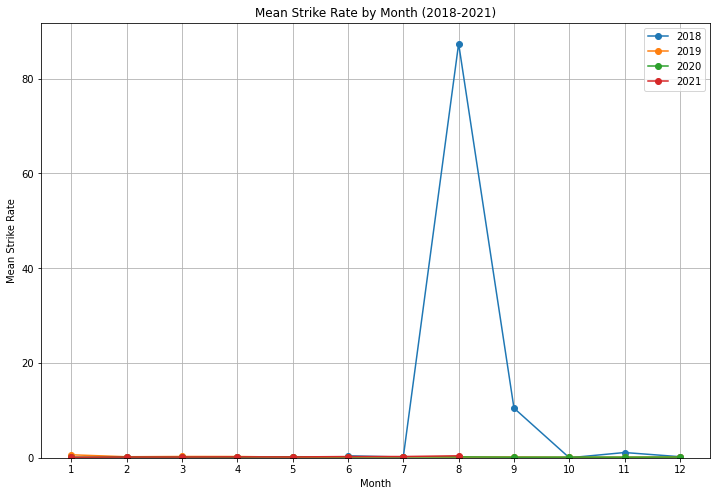

In [452]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'

# Convert 'st_year' column to integer type
data['st_year'] = data['st_year'].astype(int)

# Group the data by 'st_year' and 'st_month' and calculate the mean strike rate for each month
mean_strike_rate_by_month = data.groupby(['st_year', 'st_month'])['strike_rate'].mean().reset_index()

# Create a separate line graph for each year (2018-2021)
for year in range(2018, 2022):
    # Filter the data for the current year
    year_data = mean_strike_rate_by_month[mean_strike_rate_by_month['st_year'] == year]
    
    # Plot the line graph
    plt.plot(year_data['st_month'], year_data['strike_rate'], marker='o', label=str(year))
    
# Set the x-axis and y-axis labels
plt.xlabel('Month')
plt.ylabel('Mean Strike Rate')

# Add a legend
plt.legend()

# Add grid lines
plt.grid(True)

# Set the plot title
plt.title('Mean Strike Rate by Month (2018-2021)')

# Beautify the plot
plt.rcParams['figure.figsize'] = [18, 10]  # Adjust the figure size
plt.xticks(range(1, 13))  # Set x-axis ticks for months (1-12)
plt.ylim(bottom=0)  # Set the lower limit of y-axis to 0

# Display the plot
plt.show()


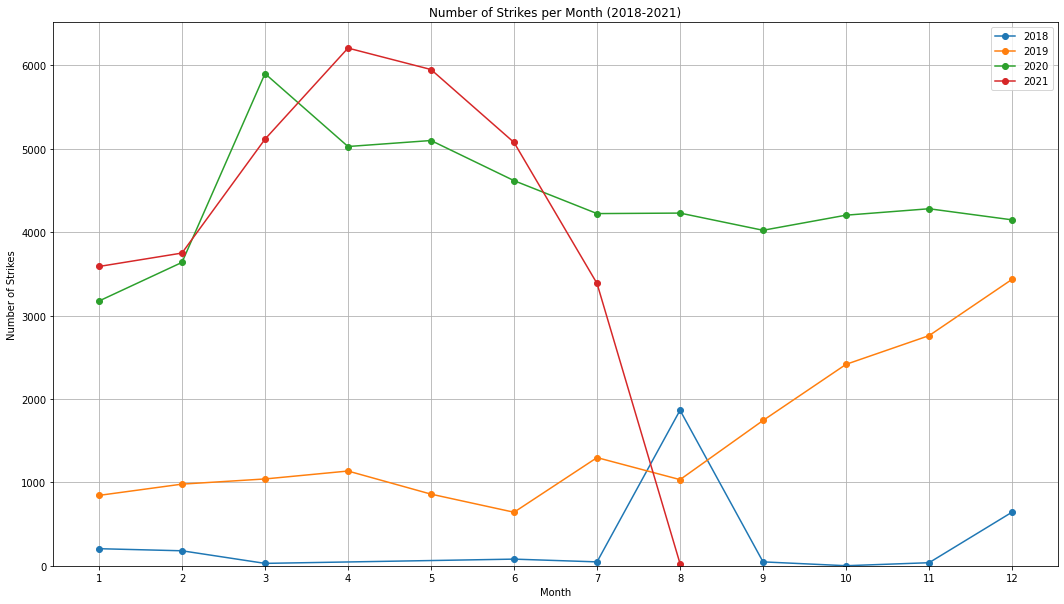

In [456]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Convert the 'strikeTime' column to datetime type
df['strikeTime'] = pd.to_datetime(df['strikeTime'])

# Extract year and month from 'strikeTime'
df['year'] = df['strikeTime'].dt.year
df['month'] = df['strikeTime'].dt.month

# Filter the DataFrame for 'STRIKE' activity type
strike_df = df[df['activityType'] == 'STRIKE']

# Group the data by 'year' and 'month' and count the number of strikes
strike_counts = strike_df.groupby(['year', 'month']).size().reset_index(name='strike_count')

# Create separate line graphs for each year (2018-2021)
for year in range(2018, 2022):
    # Filter the data for the current year
    year_data = strike_counts[strike_counts['year'] == year]
    
    # Plot the line graph
    plt.plot(year_data['month'], year_data['strike_count'], marker='o', label=str(year))
    
# Set the x-axis and y-axis labels
plt.xlabel('Month')
plt.ylabel('Number of Strikes')

# Add a legend
plt.legend()

# Add grid lines
plt.grid(True)

# Set the plot title
plt.title('Number of Strikes per Month (2018-2021)')

# Beautify the plot
plt.rcParams['figure.figsize'] = [12, 8]  # Adjust the figure size
plt.xticks(range(1, 13))  # Set x-axis ticks for months (1-12)
plt.ylim(bottom=0)  # Set the lower limit of y-axis to 0

# Display the plot
plt.show()


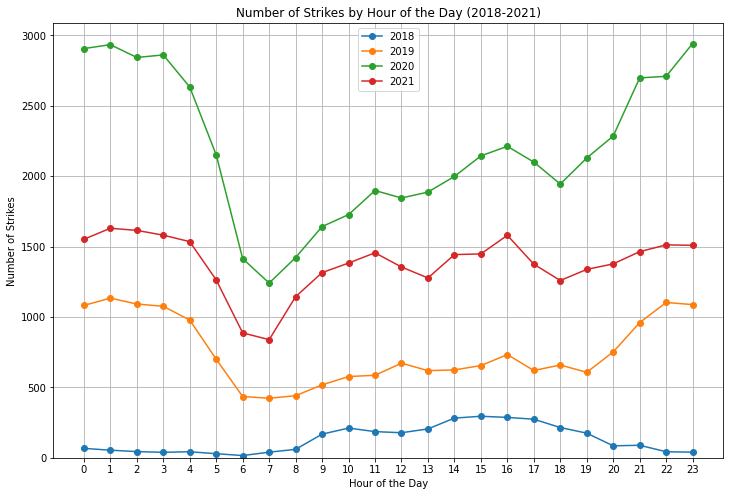

In [458]:
# Convert the 'strikeTime' column to datetime type
df['strikeTime'] = pd.to_datetime(df['strikeTime'])

# Convert 'strikeTime' to New Zealand timezone
nz_timezone = pytz.timezone('Pacific/Auckland')
df['strikeTime_NZ'] = df['strikeTime'].dt.tz_convert(nz_timezone)

# Extract year and hour from 'strikeTime_NZ'
df['year'] = df['strikeTime_NZ'].dt.year
df['hour'] = df['strikeTime_NZ'].dt.hour

# Filter the DataFrame for 'STRIKE' activity type
strike_df = df[df['activityType'] == 'STRIKE']

# Group the data by 'year' and 'hour' and count the number of strikes
strike_counts = strike_df.groupby(['year', 'hour']).size().reset_index(name='strike_count')

# Create separate line graphs for each year (2018-2021)
for year in range(2018, 2022):
    # Filter the data for the current year
    year_data = strike_counts[strike_counts['year'] == year]
    
    # Plot the line graph
    plt.plot(year_data['hour'], year_data['strike_count'], marker='o', label=str(year))
    
# Set the x-axis and y-axis labels
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Strikes')

# Add a legend
plt.legend()

# Add grid lines
plt.grid(True)

# Set the plot title
plt.title('Number of Strikes by Hour of the Day (2018-2021)')

# Beautify the plot
plt.rcParams['figure.figsize'] = [12, 8]  # Adjust the figure size
plt.xticks(range(24))  # Set x-axis ticks for hours (0-23)
plt.ylim(bottom=0)  # Set the lower limit of y-axis to 0

# Display the plot
plt.show()

In [455]:
df.columns

Index(['id', 'when', 'activityType', 'strikeTime', 'batchId', 'createdBy',
       'trapId', 'groupId', 'organisationId', 'killType', 'latitude',
       'longitude', 'temperature', 'batteryLevel', 'hasImage',
       'trapInstalledAt', 'region', 'city'],
      dtype='object')

In [441]:
(0.164-0.181)/0.164

-0.10365853658536577

### Modelling

In [495]:
#pre-processing
data = df_sr_lu.drop(['id', 'when', 'batchId', 'createdBy', 'groupId', 'organisationId', 'killType', 'latitude', 'longitude', 'batteryLevel', 'hasImage'], axis=1)

# Data preprocessing
data['strikeTime_NZ'] = pd.to_datetime(df_sr_lu['strikeTime_NZ'])
data = data[data['strikeTime_NZ'].dt.year >= 2017]
print("Before NA drop")
print(data.shape)
data = data.dropna()
print("After NA drop")
print(data.shape)


data['st_year'] = df_sr_lu['strikeTime'].dt.year
data['st_month'] = df_sr_lu['strikeTime'].dt.month
data['st_day'] = df_sr_lu['strikeTime'].dt.day
data['st_hour'] = df_sr_lu['strikeTime'].dt.hour
# data['st_minute'] = df_sr_lu['strikeTime'].dt.minute

Before NA drop
(177009, 12)
After NA drop
(116908, 12)


In [497]:
data.columns

Index(['activityType', 'strikeTime', 'trapId', 'temperature',
       'trapInstalledAt', 'region', 'city', 'landUse', 'strike_rate',
       'trapInstalledAt_NZ', 'strikeTime_NZ', 'when_NZ', 'st_year', 'st_month',
       'st_day', 'st_hour'],
      dtype='object')

In [498]:
data.shape

(116908, 16)

In [507]:
target = 'strike_rate'
spatial_features = ['region', 'city', 'landUse']
temporal_features = ['st_year', 'st_month', 'st_day', 'st_hour']

In [508]:
df_spatial

,region,city,landUse,strike_rate
4790,Waikato,Matamata,81 - Settlements or built-up area,2.000000
4793,Waikato,Matamata,81 - Settlements or built-up area,2.000000
4796,Auckland,Auckland,81 - Settlements or built-up area,0.006028
4797,Auckland,Auckland,81 - Settlements or built-up area,0.006028
4798,Auckland,Auckland,81 - Settlements or built-up area,0.006028
...,...,...,...,...
1439170,Waikato,Coromandel,71 - Natural Forest,1.000000
1439185,Wellington,Wellington,81 - Settlements or built-up area,0.016438
1439213,Auckland,Rothesay Bay,71 - Natural Forest,0.050000
1439215,Auckland,Rothesay Bay,71 - Natural Forest,0.050000


In [509]:
from sklearn.preprocessing import LabelEncoder

# Select the relevant columns from the dataframe
df_spatial = data[spatial_features + [target]]

# Apply label encoding to convert categorical variables to numerical form
label_encoder = LabelEncoder()
df_spatial_encoded = df_spatial.copy()
for feature in spatial_features:
    df_spatial_encoded[feature] = label_encoder.fit_transform(df_spatial_encoded[feature])

df_spatial_encoded.head()

,region,city,landUse,strike_rate
4790,13,48,9,2.000000
4793,13,48,9,2.000000
4796,0,4,9,0.006028
4797,0,4,9,0.006028
4798,0,4,9,0.006028


In [510]:
df_spatial_unique = df_spatial_encoded.drop_duplicates()
print(df_spatial_unique.shape)
print(df_spatial_encoded.shape)

(11689, 4)
(116908, 4)


In [511]:
print(df_spatial_encoded['region'].unique().max())
print(df_spatial_encoded['city'].unique().max())
print(df_spatial_encoded['landUse'].unique().max())

15
136
10


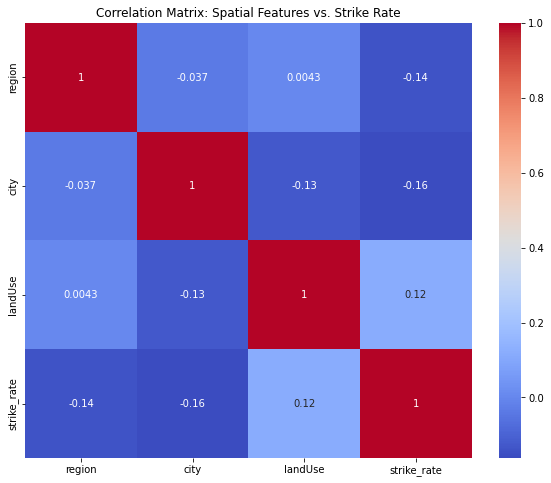

In [512]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df_spatial_encoded.corr()

# Set up the plot figure size
plt.figure(figsize=(10, 8))

# Generate the correlation matrix heatmap with a color palette
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Correlation Matrix: Spatial Features vs. Strike Rate')

# Display the plot
plt.show()

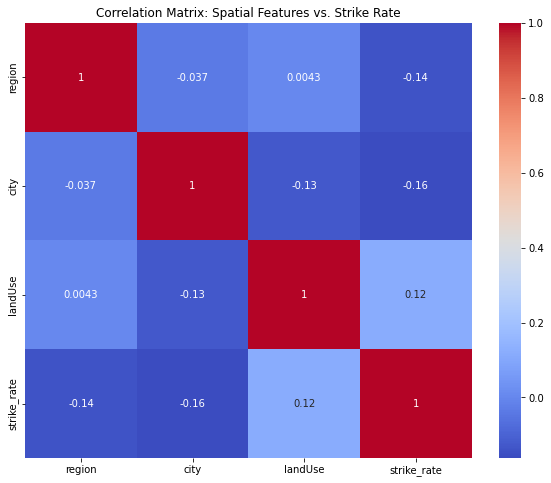

In [513]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df_spatial_encoded.corr()

# Set up the plot figure size
plt.figure(figsize=(10, 8))

# Generate the correlation matrix heatmap with a color palette
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Correlation Matrix: Spatial Features vs. Strike Rate')

# Display the plot
plt.show()

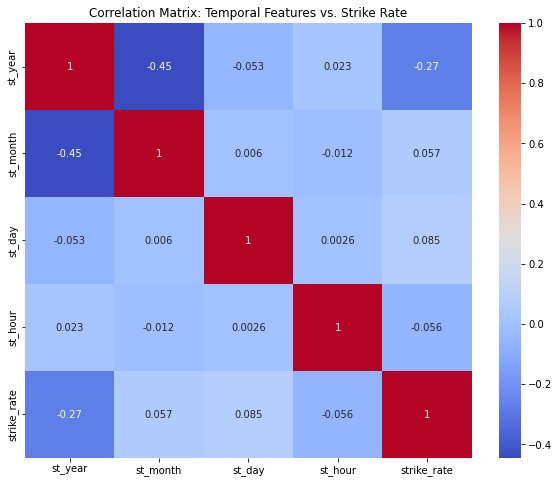

In [582]:
import seaborn as sns
import matplotlib.pyplot as plt

df_temporal = data[temporal_features + [target]]
# Compute the correlation matrix
corr_matrix = df_temporal.corr()

# Set up the plot figure size
plt.figure(figsize=(10, 8))

# Generate the correlation matrix heatmap with a color palette
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Correlation Matrix: Temporal Features vs. Strike Rate')

# Display the plot
plt.show()

/tmp/ipykernel_3121/1579028018.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[feature] = label_encoder.fit_transform(df_all[feature])


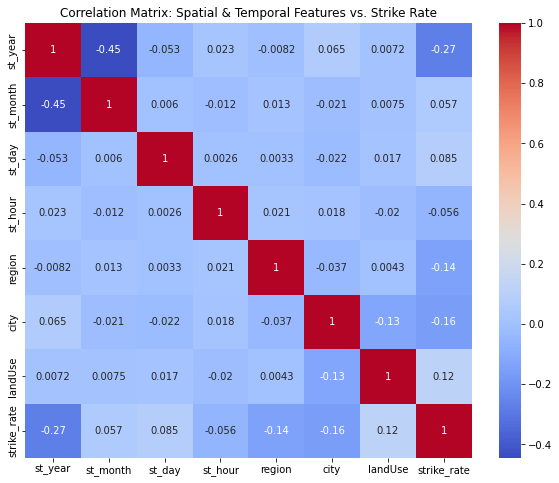

In [515]:
import seaborn as sns
import matplotlib.pyplot as plt

df_all = data[temporal_features + spatial_features + [target]]
# encoded_df_all = pd.get_dummies(df_all, columns=spatial_features)


# Apply label encoding to convert categorical variables to numerical form
label_encoder = LabelEncoder()
for feature in spatial_features:
    df_all[feature] = label_encoder.fit_transform(df_all[feature])
    
# Compute the correlation matrix
corr_matrix = df_all.corr()

# Set up the plot figure size
plt.figure(figsize=(10, 8))

# Generate the correlation matrix heatmap with a color palette
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Correlation Matrix: Spatial & Temporal Features vs. Strike Rate')

# Display the plot
plt.show()

In [516]:
import scipy.stats as stats


def t_test(a, b, alt = 'less'):
    """
    Calculate the cosine similarity between a query and a document using the vector space model.
 
    Parameters:
    -----------
    a: list
        1st list for comparison
    b: list
        2nd list for comparison
    alt: alternative parameter
        Set to 'less' for one-tailed test
    Returns:
    --------
    stats.ttest_ind
        T and P-value 
    """
    return stats.ttest_ind(a, b,alternative = alt)    

In [517]:
df_all

,st_year,st_month,st_day,st_hour,region,city,landUse,strike_rate
4790,2018.0,7.0,31.0,22.0,13,48,9,2.000000
4793,2018.0,7.0,31.0,22.0,13,48,9,2.000000
4796,2018.0,8.0,3.0,1.0,0,4,9,0.006028
4797,2018.0,7.0,31.0,22.0,0,4,9,0.006028
4798,2018.0,7.0,25.0,3.0,0,4,9,0.006028
...,...,...,...,...,...,...,...,...
1439170,2021.0,8.0,1.0,13.0,13,15,0,1.000000
1439185,2021.0,5.0,2.0,20.0,14,127,9,0.016438
1439213,2021.0,6.0,19.0,14.0,0,94,0,0.050000
1439215,2021.0,7.0,30.0,13.0,0,94,0,0.050000


In [519]:
df_model = df_all.drop(target, axis=1)
df_model = df_all.drop(target, axis=1)

df_model.head()
features = df_model.columns
features

Index(['st_year', 'st_month', 'st_day', 'st_hour', 'region', 'city',
       'landUse'],
      dtype='object')

In [520]:
# df_model = df_model.drop('st_minute')
features = df_model.columns
features

Index(['st_year', 'st_month', 'st_day', 'st_hour', 'region', 'city',
       'landUse'],
      dtype='object')

In [521]:
for feature in features:
    t_test_results = t_test(df_all[feature], df_all['strike_rate'])
    print(f"T-test result for Strike Rate vs {feature}: ")
    print(t_test_results)

T-test result for Strike Rate vs st_year: 
Ttest_indResult(statistic=48587.46151863446, pvalue=1.0)
T-test result for Strike Rate vs st_month: 
Ttest_indResult(statistic=105.38304774828494, pvalue=1.0)
T-test result for Strike Rate vs st_day: 
Ttest_indResult(statistic=295.06604012270395, pvalue=1.0)
T-test result for Strike Rate vs st_hour: 
Ttest_indResult(statistic=203.90202684368515, pvalue=1.0)
T-test result for Strike Rate vs region: 
Ttest_indResult(statistic=143.0354343684081, pvalue=1.0)
T-test result for Strike Rate vs city: 
Ttest_indResult(statistic=548.0472222676123, pvalue=1.0)
T-test result for Strike Rate vs landUse: 
Ttest_indResult(statistic=85.2269227248018, pvalue=1.0)


In [522]:
t_test(df_all['region'], df_all['landUse'])

Ttest_indResult(statistic=147.86688868097636, pvalue=1.0)

In [523]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_all[features], df_all[target], test_size=0.2, random_state=42)

# Initialize and train a Poisson regression model
poisson_regressor = PoissonRegressor()
poisson_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_poisson = poisson_regressor.predict(X_test)

# Evaluate the Poisson regression model using various metrics
mse_poisson = mean_squared_error(y_test, y_pred_poisson)
mae_poisson = mean_absolute_error(y_test, y_pred_poisson)
r2_poisson = r2_score(y_test, y_pred_poisson)

/home/anjan/venv/cab420/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [524]:
# Feature importance using coefficients
feature_importance = pd.DataFrame({'Feature': features, 'Importance': np.abs(poisson_regressor.coef_)})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print('Feature Importance:')
print(feature_importance)

Feature Importance:
    Feature  Importance
4    region    0.265936
1  st_month    0.160895
6   landUse    0.159598
2    st_day    0.084194
5      city    0.044067
3   st_hour    0.037320
0   st_year    0.000452


In [525]:
feature_importance.to_csv('feature_importance.csv', index=False)

In [526]:
# Perform cross-validation to assess model performance
cv_scores_poisson = cross_val_score(poisson_regressor, df_all[features], df_all[target], cv=5, scoring='neg_mean_squared_error')

print('Cross-Validation Mean Squared Error (Poisson Regression):')
print(-cv_scores_poisson.mean())

/home/anjan/venv/cab420/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/home/anjan/venv/cab420/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/home/anjan/venv/cab420/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i

Cross-Validation Mean Squared Error (Poisson Regression):
230.04768538435815


/home/anjan/venv/cab420/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [527]:
# Evaluate the Poisson regression model using various metrics
mse_poisson = mean_squared_error(y_test, y_pred_poisson)
mae_poisson = mean_absolute_error(y_test, y_pred_poisson)
r2_poisson = r2_score(y_test, y_pred_poisson)

In [528]:
print('Poisson Regression Metrics:')
print('Mean Squared Error:', mse_poisson)
print('Mean Absolute Error:', mae_poisson)
print('R-squared:', r2_poisson)

Poisson Regression Metrics:
Mean Squared Error: 130.31665124431225
Mean Absolute Error: 1.9233437591592113
R-squared: 0.36942757294558815


In [529]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [530]:
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [531]:
y_pred_gb = gb_regressor.predict(X_test)

In [532]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [533]:
y_pred_rf = rf_regressor.predict(X_test)

In [534]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [535]:
# Initialize and train a Random Forest model
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing set using the Random Forest model
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the Random Forest model using various metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Poisson Regression Metrics:')
print('Mean Squared Error:', mse_poisson)
print('Mean Absolute Error:', mae_poisson)
print('R-squared:', r2_poisson)
print("---------------------------------------------------------------")
print('Gradient Boosting Metrics:')
print('Mean Squared Error:', mse_gb)
print('Mean Absolute Error:', mae_gb)
print('R-squared:', r2_gb)
print("---------------------------------------------------------------")
print('Random Forest Metrics:')
print('Mean Squared Error:', mse_rf)
print('Mean Absolute Error:', mae_rf)
print('R-squared:', r2_rf)


Poisson Regression Metrics:
Mean Squared Error: 130.31665124431225
Mean Absolute Error: 1.9233437591592113
R-squared: 0.36942757294558815
---------------------------------------------------------------
Gradient Boosting Metrics:
Mean Squared Error: 21.84154062906415
Mean Absolute Error: 0.7356975517074529
R-squared: 0.8943137875814804
---------------------------------------------------------------
Random Forest Metrics:
Mean Squared Error: 13.797730550825746
Mean Absolute Error: 0.4287525770516267
R-squared: 0.9332359421593353


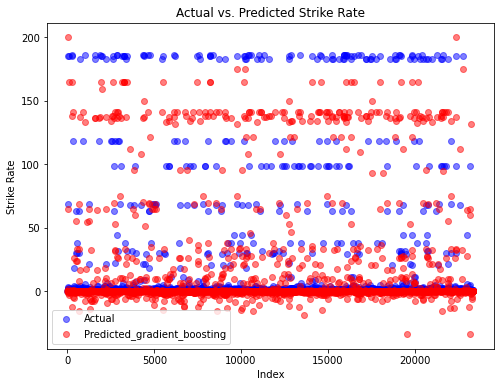

In [536]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the y_test and y_pred_gb values stored in variables named 'y_test' and 'y_pred_gb' respectively

# Generate an array of indices to use as x-axis
indices = np.arange(len(y_test))

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the actual values
plt.scatter(indices, y_test, color='blue', label='Actual', alpha=0.5)

# Plotting the predicted values
plt.scatter(indices, y_pred_gb, color='red', label='Predicted_gradient_boosting', alpha=0.5)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Strike Rate')
plt.title('Actual vs. Predicted Strike Rate')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

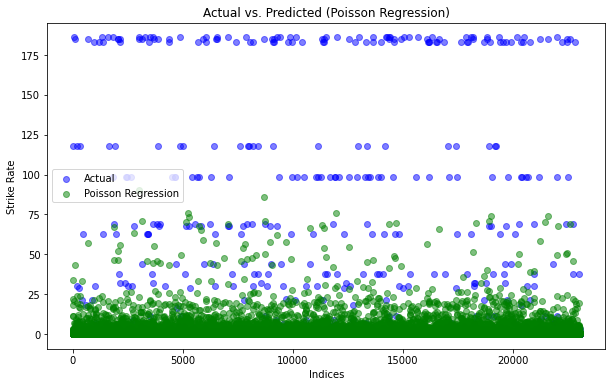

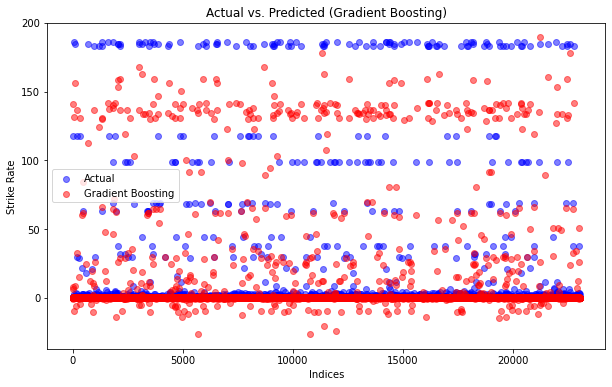

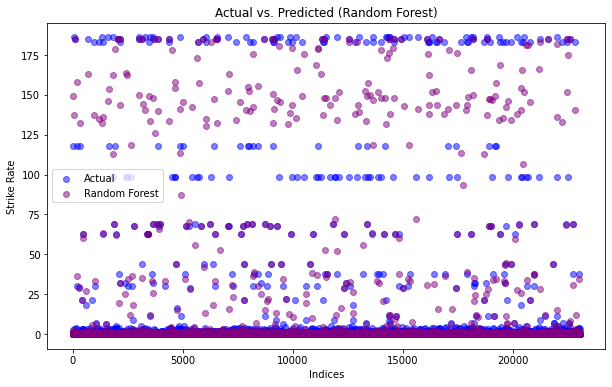

In [434]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the y_test, y_pred_poisson, y_pred_gb, and y_pred_rf values stored in corresponding variables

indices = np.arange(len(y_test))  # Generate an array of indices as x-axis

plt.figure(figsize=(10, 6))  # Set the figure size

# Plotting the relationship between y_test and y_pred_poisson as scatter plot
plt.scatter(indices, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(indices, y_pred_poisson, color='green', label='Poisson Regression', alpha=0.5)
plt.xlabel('Indices')
plt.ylabel('Strike Rate')
plt.title('Actual vs. Predicted (Poisson Regression)')
plt.legend()

# Display the plot
plt.show()

plt.figure(figsize=(10, 6))  # Set the figure size

# Plotting the relationship between y_test and y_pred_gb as scatter plot
plt.scatter(indices, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(indices, y_pred_gb, color='red', label='Gradient Boosting', alpha=0.5)
plt.xlabel('Indices')
plt.ylabel('Strike Rate')
plt.title('Actual vs. Predicted (Gradient Boosting)')
plt.legend()

# Display the plot
plt.show()

plt.figure(figsize=(10, 6))  # Set the figure size

# Plotting the relationship between y_test and y_pred_rf as scatter plot
plt.scatter(indices, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(indices, y_pred_rf, color='purple', label='Random Forest', alpha=0.5)
plt.xlabel('Indices')
plt.ylabel('Strike Rate')
plt.title('Actual vs. Predicted (Random Forest)')
plt.legend()

# Display the plot
plt.show()
